In [51]:
# IMPORTANDO AS BIBLIOTECAS
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.DataFrame ({
    "Potencia" :[120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    "Eficiencia":[92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    "Idade(anos)":[3, 8, 5 , 4, 7, 2, 10, 6, 3, 9],
    "Tamanho":[60, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    "Consumo de Energia":['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente',
                'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
})

In [53]:
X = data [['Potencia', 'Eficiencia', 'Idade(anos)', 'Tamanho']]
y = data['Consumo de Energia']

In [54]:
X

,Potencia,Eficiencia,Idade(anos),Tamanho
0,120,92,3,60
1,80,65,8,45
2,100,75,5,55
3,110,85,4,60
4,90,68,7,48
5,130,95,2,62
6,70,60,10,40
7,105,80,6,58
8,115,88,3,56
9,85,70,9,47


In [55]:
y

0      Eficiente
1    Ineficiente
2    Ineficiente
3      Eficiente
4    Ineficiente
5      Eficiente
6    Ineficiente
7      Eficiente
8      Eficiente
9    Ineficiente
Name: Consumo de Energia, dtype: object

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)


In [57]:
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)


SVC(kernel='linear')

In [58]:
# FAZENDO AS PREDIÇÕES
yprev = modelo.predict(X_test)

In [59]:
yprev

array(['Eficiente', 'Ineficiente', 'Eficiente'], dtype=object)

In [60]:
X_test

,Potencia,Eficiencia,Idade(anos),Tamanho
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [61]:
data.head(10)

,Potencia,Eficiencia,Idade(anos),Tamanho,Consumo de Energia
0,120,92,3,60,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [62]:
# CALCULO DAS METRICAS DO ALGORITMO DE MACHINE LEARNING
# ACURACIA = VP/ VP+FP+VN
acc = accuracy_score(yprev,y_test)
acc

1.0

In [63]:
# CLASSFICATION REPORT
cr = classification_report(yprev, y_test)
print(cr)

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [64]:
# MATRIZ DE CONFUSÃO
cm = confusion_matrix(yprev, y_test)
print(cm)

[[2 0]
 [0 1]]


Text(47.25, 0.5, 'Real')

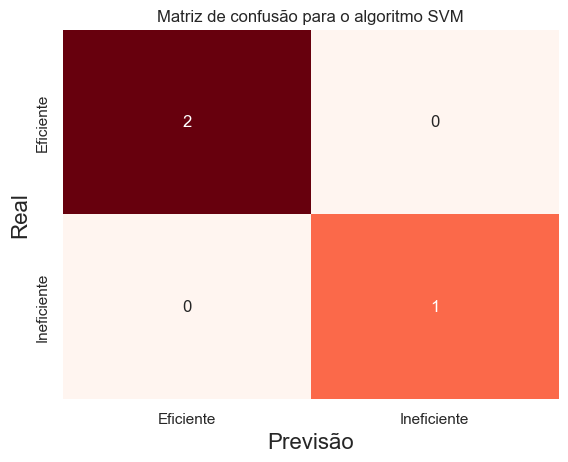

In [65]:
sns.heatmap(cm,annot=True, cmap='Reds', cbar=False,
            xticklabels=['Eficiente', 'Ineficiente'], 
            yticklabels=['Eficiente','Ineficiente'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM')
plt.xlabel('Previsão', fontsize=16)
plt.ylabel('Real', fontsize=16)

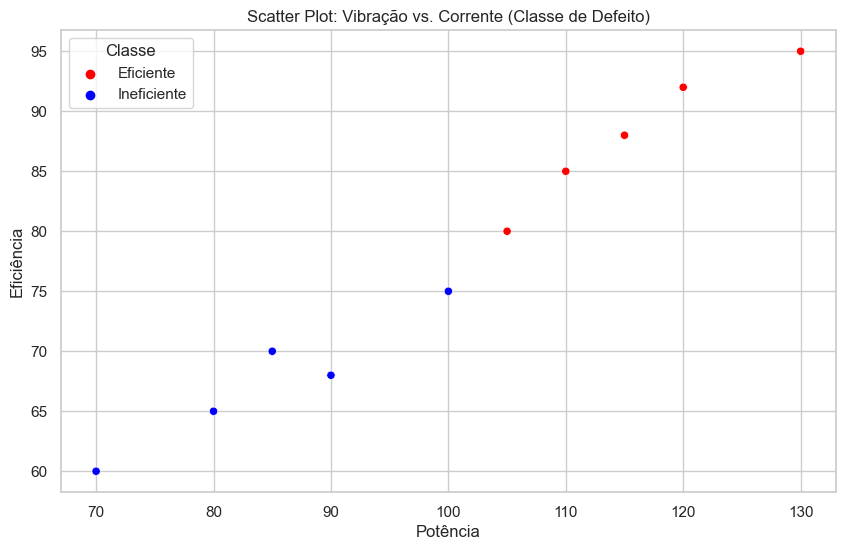

In [66]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Eficiente": "red", "Ineficiente": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potencia', y='Eficiencia', hue='Consumo de Energia', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potencia vs. Eficiencia (Classe de Consumos de Energia)')
plt.xlabel('Potência')
plt.ylabel('Eficiência')

# Mostrando o gráfico
plt.legend(title='Classe')
plt.show()  